# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# Set up Splinter
executable_path={'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome',**executable_path,headless=False)

# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [3]:
# Create a Beautiful Soup Object
html = browser.html
weather_soup = soup(html, 'html.parser')

# Take a peep to see what mars_soup looks like
weather_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [22]:
# Extract all rows of data
# I'll go ahead and split all the data into a list of rows. I also want each row to be a list of the row entries, instead of one long string.
rows = weather_soup.find_all('tr',class_="data-row")
row_list = [row.text.split() for row in rows]

In [23]:
# Extract the table header while we're at it
header = weather_soup.find_all('th')
header_list = [i.text for i in header]
header_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [24]:
# Look at the first row just to see how it turned out.
row_list[0]

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']

In [25]:
# That looks like something we can throw in a pandas dataframe. Let's do that.
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(row_list, columns = header_list)
# Take a peep.
df.head()

id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0

In [26]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [28]:
# As expected - the split() gave me a list of strings. Let's change those up.
df = df.astype({'id':int,'sol':int,'ls':int,'month':int,'min_temp':float,'pressure':float})
df.dtypes

id                    int32
terrestrial_date     object
sol                   int32
ls                    int32
month                 int32
min_temp            float64
pressure            float64
dtype: object

In [31]:
# Gotta do the same with the date column.
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [33]:
# Take another look, for fun.
df.head()

id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0

## Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [35]:
# 1. How many months exist on Mars?
# Let's see how many unique values are in the month column.
print(f"There are {len(df.month.unique())} months on Mars.")

There are 12 months on Mars.


In [38]:
# 2. How many Martian days worth of data exist in the dataset.
# Turns out the sols are basically days. Had to google that one real quick. Let's see if there are any repeats in the sol column.
len(df['sol'])==len(df.sol.unique())

True

In [39]:
# No repeats! So
print(f"There are {len(df.sol.unique())} Martian days worth of data in this dataset.")

There are 1867 Martian days worth of data in this dataset.


In [41]:
# 3. What are the coldest and the warmest months on Mars?
grouped_temps = df.groupby('month').mean()['min_temp']
grouped_temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

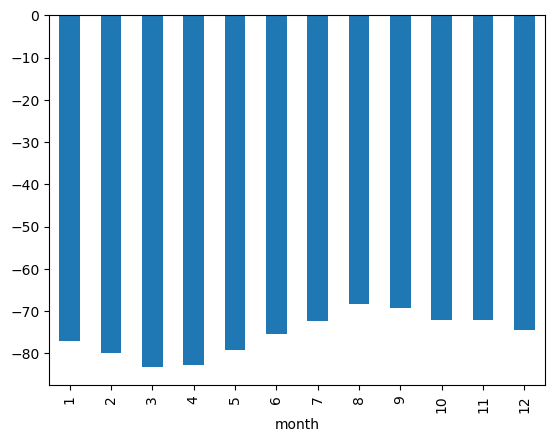

In [44]:
# Plot the averages in a bar chart.
graph = grouped_temps.plot.bar(x='month', y='min_temp')

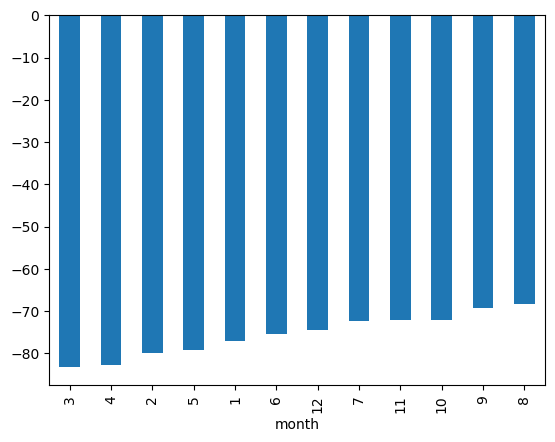

In [48]:
# Sort these averages so that we can more easily see which months are coldest/warmest?
graph = grouped_temps.sort_values().plot.bar(x='month', y='min_temp')

In [49]:
# So Month 3 is the coldest and Month 8 is the warmest.
# We'll repeat this whole process but this time with atmosphere pressure instead of temperature.
# 4. Which months have the lowest and the highest atmospheric pressure on Mars? 
grouped_pressure = df.groupby('month').mean()['pressure']
grouped_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

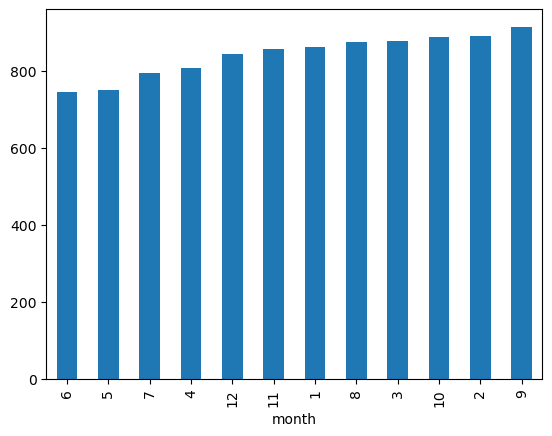

In [51]:
# It's time for another graph. Let's skip straight to sorting it this time.
graph = grouped_pressure.sort_values().plot.bar(x='month', y='pressure')

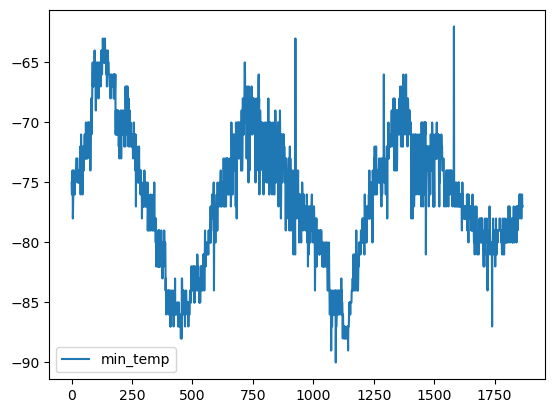

In [55]:
# So Month 6 has the lowest pressure and Month 9 has the highest. Assuming I have even the barest understanding of how pressure is measured.
# 5. How many terrestrial (earth) days are there in a Martian year?
# Try plotting the temperatures by terrestrial date instead of Mars date. We'll just use the index because each row is for 1 Earth day in the dataset.

graph = df.plot.line(y='min_temp',use_index=True)

In [56]:
# Totally stealing the starter code analysis for this one because my numbers line up.
# The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot.
# Sorry I couldn't word that better.

In [57]:
# Write the data to a CSV for safekeeping.
df.to_csv('mars_weather_data.csv')

In [58]:
browser.quit()